In [2]:
import nltk
import numpy as np

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import string
import math
import os

In [3]:
#Aqui você tem que por o diretório da pasta que tem todos os documentos:
DIR = "C:\Users\Marília\Desktop\python_experience\padroesAgrupamento\alldocs"

In [4]:
for files in os.walk(DIR):
    d = files
documents = d[2][:]

terms = [
    "carbohydr",
    "oligosaccharid",
    "glycosyl",
    "glycoprotein",
    "diseas",
    "cell",
    "develop",
    "In",
    "site",
    "bind",
    "express",
    "structur",
    "result",
    "analysi",
    "one",
    "cancer",
    "protein",
    "signal",
    "assay",
    "regul",
    "activ",
    "diseas",
    "effect",
    "respons",
    "pathway",
    "express",
    "therapeut",
    "increas",
    "inhibit",
    "patient",
    "hta",
    "technolog",
    "percent",
    "implement",
    "compar",
    "system",
    "evalu",
    "recommend",
    "review",
    "activ",
    "evid",
    "report",
    "improv",
    "research",
    "morphin",
    "mobil",
    "signific",
    "naloxon",
    "rate",
    "report",
    "epidur",
    "time",
    "effect",
    "found",
    "pain",
    "countri",
    "the",
    "care",
    "least",
    "patient",
    "featur",
    "high",
    "detect",
    "measur",
    "clinic",
    "annot",
    "learn",
    "system",
    "diseas",
    "care",
    "health",
    "impact",
    "cancer",
    "concept",
    "countri",
    "univers",
    "health",
    "system",
    "organiz",
    "manag",
    "applic",
    "systemat",
    "care",
    "scienc",
    "data",
    "commun",
    "inform",
    "provid",
    "sequenc",
    "analysi",
    "tool",
    "genom",
    "method",
    "variant",
    "gene",
    "associ",
    "studi",
    "model",
    "packag",
    "develop",
    "result",
    "algorithm",
    "perform",
]

terms = list(set(terms))

NameError: name 'd' is not defined

In [4]:
fullText = []

#Gambiarra to read Mayandre's files
Mayandre = [
    "10MY.txt",
    "3MY.txt",
    "4MY.txt",
    "7MY.txt",
    "8MY.txt",
    "9MY.txt"
]

for i in range(0, len(documents)):

    #####################################################################################################
    #Gambiarra's start delimiter
    test = True
    
    for j in Mayandre:
        if documents[i] == j:
            file = open(DIR + documents[i], "r", encoding = "utf-16")
            fullText.append(file.read())
            test = False
    
    if test:
        #####################################################################################################
        #Gambiarra's end delimiter
        file = open(DIR + documents[i], "r")
        fullText.append(file.read())

In [5]:
stopWords = set(stopwords.words('english'))
stopWords.add("Abstract")
stopWords.add("Review")
stopWords.add("Results")
stopWords.add("Conclusions")
stopWords.add("Methods")
punctuations = list(string.punctuation)

ps = PorterStemmer()

finalList = []

for i in range(0,len(documents)):

    words = word_tokenize(fullText[i])
    processedWords = []
    for word in words:
        if word not in stopWords and word not in punctuations:
            processedWords.append(ps.stem(word))
    
    finalList.append(processedWords)

In [6]:
freqRel = []
palavrasPorDoc = []

for i in range(0, len(finalList)):
    novaLista = list(set(finalList[i]))
    palavrasPorDoc.append(novaLista)
    
    outraLista = []
    for j in terms:
        if finalList[i].count(j) > 0:
            outraLista.append([j, 1 + math.log10(finalList[i].count(j))])
        else:
            outraLista.append([j, 0])
        
    freqRel.append(outraLista)
    
freqRel

[[['compar', 0],
  ['analysi', 0],
  ['detect', 0],
  ['effect', 0],
  ['one', 0],
  ['time', 0],
  ['care', 0],
  ['recommend', 0],
  ['mobil', 0],
  ['cancer', 1.7781512503836436],
  ['countri', 0],
  ['perform', 0],
  ['univers', 0],
  ['glycosyl', 0],
  ['cell', 1.0],
  ['increas', 0],
  ['signal', 0],
  ['studi', 0],
  ['report', 0],
  ['packag', 0],
  ['improv', 1.3010299956639813],
  ['high', 1.0],
  ['develop', 1.0],
  ['evid', 0],
  ['data', 0],
  ['rate', 1.0],
  ['genom', 0],
  ['percent', 0],
  ['express', 1.0],
  ['oligosaccharid', 0],
  ['pathway', 0],
  ['annot', 0],
  ['assay', 0],
  ['respons', 0],
  ['site', 0],
  ['clinic', 1.0],
  ['protein', 1.0],
  ['impact', 0],
  ['implement', 0],
  ['bind', 0],
  ['morphin', 0],
  ['glycoprotein', 0],
  ['featur', 0],
  ['health', 0],
  ['the', 0],
  ['system', 0],
  ['applic', 0],
  ['naloxon', 0],
  ['In', 0],
  ['measur', 0],
  ['evalu', 0],
  ['carbohydr', 0],
  ['commun', 0],
  ['diseas', 0],
  ['systemat', 0],
  ['manag',

In [7]:
idf = []

for word in terms:
    
    counter = 0;
    for i in range(0, len(finalList)):
        if finalList[i].count(word) > 0:
            counter = counter + 1;
            
    idf.append([word, math.log10((len(finalList) + 1) / counter)])
    
idf

[['compar', 0.7075701760979364],
 ['analysi', 0.5314789170422551],
 ['detect', 0.8422687499953926],
 ['effect', 0.5125935728818813],
 ['one', 0.7075701760979364],
 ['time', 0.7222934329186427],
 ['care', 1.0086001717619175],
 ['recommend', 1.4065401804339552],
 ['mobil', 1.7075701760979363],
 ['cancer', 0.8624721360836796],
 ['countri', 1.5826314394896364],
 ['perform', 0.5512229752380123],
 ['univers', 1.281601443825655],
 ['glycosyl', 1.4065401804339552],
 ['cell', 0.5125935728818813],
 ['increas', 0.6532125137753437],
 ['signal', 0.9294189257142927],
 ['studi', 0.2925968281271184],
 ['report', 0.6933297369833261],
 ['packag', 1.105510184769974],
 ['improv', 0.7375333994753795],
 ['high', 0.8624721360836796],
 ['develop', 0.4212634372546615],
 ['evid', 0.9542425094393249],
 ['data', 0.2925968281271184],
 ['rate', 1.105510184769974],
 ['genom', 0.6661774909397113],
 ['percent', 1.5826314394896364],
 ['express', 0.6406233864673231],
 ['oligosaccharid', 1.4857214264815801],
 ['pathway',

In [26]:
tfidf = []

for doc in range(0, len(freqRel)):
    temp = []
    for i in range(0, len(freqRel[doc])):
        for j in range(0, len(idf)):
            if idf[j][0] == freqRel[doc][i][0]:
                res = freqRel[doc][i][1] * idf[j][1]
        temp.append(res)
    tfidf.append(temp)

tfidf

[[0.0,
  0.9595530755214944,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.715402657373384,
  0.0,
  0.6283889300503115,
  0.0,
  0.0,
  0.5125935728818813,
  0.0,
  0.0,
  0.0,
  0.6795414524976928,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.6406233864673231,
  0.0,
  0.4212634372546615,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.105510184769974,
  0.0,
  0.5412387543314113,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.5336059071982469,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.7533276666586115,
  0.8624721360836796,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.6795414524976928,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.1915960949823875,
  0.0,
  0.0,
  0.0,
  1.4383019108977664,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0669149819085577

In [27]:
from sklearn import metrics
from sklearn.cluster import KMeans
from numpy import *

import pandas as pd 

import matplotlib.pyplot as plt

%matplotlib inline

In [111]:

from sklearn.cluster import KMeans

num_clusters = 7

km = KMeans(n_clusters=num_clusters, init = 'random', max_iter = 400)

km.fit(tfidf)

y_kmeans = km.predict(tfidf)

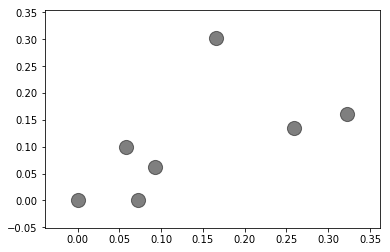

In [112]:
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


In [113]:
clusters = km.labels_.tolist()

In [114]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 152 samples in 0.000s...
[t-SNE] Computed neighbors for 152 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 152 / 152
[t-SNE] Mean sigma: 1.431692
[t-SNE] Computed conditional probabilities in 0.052s
[t-SNE] Iteration 50: error = 67.7396317, gradient norm = 0.4469770 (50 iterations in 0.763s)
[t-SNE] Iteration 100: error = 68.9248505, gradient norm = 0.3993620 (50 iterations in 0.884s)
[t-SNE] Iteration 150: error = 64.8077011, gradient norm = 0.4890194 (50 iterations in 0.954s)
[t-SNE] Iteration 200: error = 72.2618561, gradient norm = 0.4209808 (50 iterations in 1.115s)
[t-SNE] Iteration 250: error = 66.4224167, gradient norm = 0.4556043 (50 iterations in 1.267s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.422417
[t-SNE] Iteration 300: error = 1.0387985, gradient norm = 0.0119244 (50 iterations in 1.138s)
[t-SNE] Iteration 350: error = 0.8424592, gradient norm = 0.0048807 

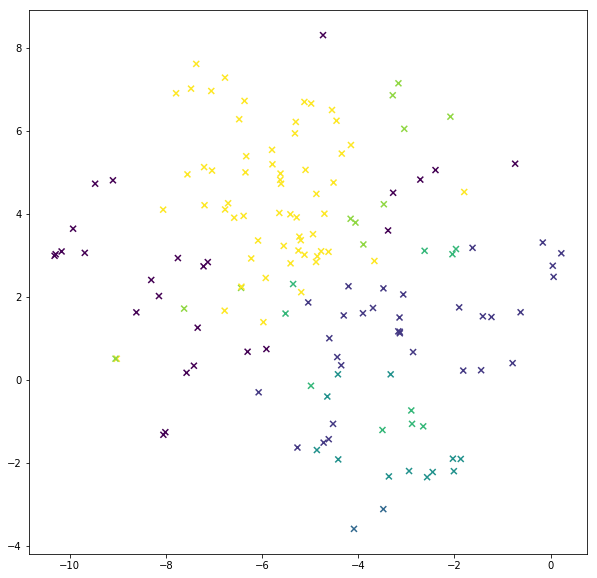

In [115]:
k = 85
tfs_reduced = TruncatedSVD(n_components=k, random_state=0).fit_transform(tfidf)
tfs_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(tfs_reduced)
fig = plt.figure(figsize = (10, 10))
ax = plt.axes()
plt.scatter(tfs_embedded[:, 0], tfs_embedded[:, 1], marker = "x", c = km.labels_)
plt.show()

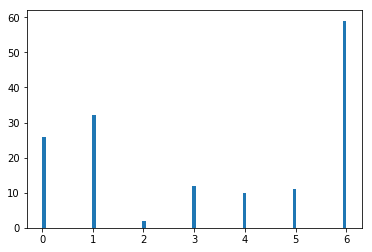

In [116]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(km.labels_, bins=k)
plt.show()

In [117]:
cluster_assignments_dict = {}

for i in set(km.labels_):
    current_cluster_bills = [documents[x] for x in np.where(km.labels_ == i)[0]]
    cluster_assignments_dict[i] = current_cluster_bills

In [124]:

import os
from string import digits
remove_digits = str.maketrans('', '', digits)

for cluster_id in range(0,7):
    print ('Cluster {0}' . format(cluster_id))
    #print (cluster_assignments_dict[cluster_id])
    array = []
    for key in cluster_assignments_dict[cluster_id]:
        array.append( print((os.path.splitext(key)[0]).translate(remove_digits))

Cluster 0
MG
MY
MG
MG
MG
MG
MG
MY
MG
RA
VM
BC
MY
MG
MY
RA
VM
MG
RA
MG
MG
MY
MG
MY
MG
MY
Cluster 1
BC
MT
BC
MT
MT
BC
MT
BC
MT
BC
BC
BC
BC
BC
BC
BC
MY
BC
BC
BC
BC
BC
MT
BC
BC
MT
MT
BC
MT
MT
BC
MT
Cluster 2
RA
BC
Cluster 3
BC
BC
BC
BC
BC
BC
BC
BC
BC
BC
BC
VM
Cluster 4
MT
BC
MT
BC
BC
MT
BC
NR
MT
MY
Cluster 5
VM
VM
VM
VM
VM
VM
VM
RA
RA
VM
VM
Cluster 6
NR
MG
NR
MT
NR
NR
BC
NR
MT
NR
NR
NR
NR
NR
NR
VM
NR
NR
NR
NR
NR
BC
NR
NR
NR
NR
NR
NR
NR
NR
NR
NR
NR
NR
NR
NR
NR
MG
NR
RA
NR
NR
NR
NR
NR
NR
NR
NR
NR
NR
NR
NR
MY
NR
NR
VM
NR
NR
NR
